In [32]:
import os
import cv2 as cv
import argparse
from sklearn.svm import LinearSVC
from skimage import feature
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from utils import read_img
from sklearn.metrics import f1_score
import joblib
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

In [2]:
train_image_paths = []
train_labels = []
# get all the image folder paths
Categories=['black widow', 'captain america', 'doctor strange', 'hulk', 'ironman', 'loki', 'spider-man', 'thanos']
datadir='dataset\\train' 

for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        train_image_paths.append(os.path.join(path,img))
        train_labels.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : black widow
loaded category:black widow successfully
loading... category : captain america
loaded category:captain america successfully
loading... category : doctor strange
loaded category:doctor strange successfully
loading... category : hulk
loaded category:hulk successfully
loading... category : ironman
loaded category:ironman successfully
loading... category : loki
loaded category:loki successfully
loading... category : spider-man
loaded category:spider-man successfully
loading... category : thanos
loaded category:thanos successfully


In [3]:
test_image_paths = []
test_labels = []
# get all the image folder paths
Categories=['black widow', 'captain america', 'doctor strange', 'hulk', 'ironman', 'loki', 'spider-man', 'thanos']
datadir='dataset\\test' 

for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        test_image_paths.append(os.path.join(path,img))
        test_labels.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : black widow
loaded category:black widow successfully
loading... category : captain america
loaded category:captain america successfully
loading... category : doctor strange
loaded category:doctor strange successfully
loading... category : hulk
loaded category:hulk successfully
loading... category : ironman
loaded category:ironman successfully
loading... category : loki
loaded category:loki successfully
loading... category : spider-man
loaded category:spider-man successfully
loading... category : thanos
loaded category:thanos successfully


# SIFT

In [4]:
scaler = StandardScaler()
def bag_of_words_SIFT(image_paths, codebook):
    orb = cv.SIFT_create(nfeatures=300)
    codebook_size = codebook.shape[0]
    image_features = []
    for image_path in image_paths:
        img = read_img(image_path, mono=True)
        keypoints, descriptors = orb.detectAndCompute(img, None)
        bow = np.zeros(codebook_size)
        if descriptors is not None:
            distances = cdist(descriptors, codebook)
            for d in distances:
                bow[np.argmin(d)] += 1
        image_features.append(bow.reshape(1, codebook_size))
    image_features = np.concatenate(image_features)
    return image_features

In [5]:
codebook_SIFT = joblib.load('codebook_SIFT.joblib')
svm_SIFT = joblib.load('svm_bow_SIFT.joblib')

In [6]:
print('Generating BOW features for training set...')
train_images_SIFT = bag_of_words_SIFT(train_image_paths, codebook_SIFT)
train_images_scaled_SIFT = scaler.fit_transform(train_images_SIFT)
print('Train images:', train_images_SIFT.shape)

print('Generating BOW features for test set...')
test_images_SIFT = bag_of_words_SIFT(test_image_paths, codebook_SIFT)
test_images_scaled_SIFT = scaler.transform(test_images_SIFT)
print('Test images:', test_images_SIFT.shape)


Generating BOW features for training set...
Train images: (2325, 150)
Generating BOW features for test set...
Test images: (451, 150)


In [7]:
test_predictions_SIFT = svm_SIFT.predict(test_images_scaled_SIFT)
f1_SIFT = f1_score(test_labels, test_predictions_SIFT, average='macro')
print(f1_SIFT)

0.26056000856311634


# ORB

In [8]:
scaler = StandardScaler()
def bag_of_words_ORB(image_paths, codebook):
    orb = cv.ORB_create(nfeatures=300)
    codebook_size = codebook.shape[0]
    image_features = []
    for image_path in image_paths:
        img = read_img(image_path, mono=True)
        keypoints, descriptors = orb.detectAndCompute(img, None)
        bow = np.zeros(codebook_size)
        if descriptors is not None:
            distances = cdist(descriptors, codebook)
            for d in distances:
                bow[np.argmin(d)] += 1
        image_features.append(bow.reshape(1, codebook_size))
    image_features = np.concatenate(image_features)
    return image_features

In [9]:
codebook_ORB = joblib.load('codebook_ORB.joblib')
svm_ORB = joblib.load('svm_bow_ORB.joblib')

In [10]:
print('Generating BOW features for training set...')
train_images_ORB = bag_of_words_ORB(train_image_paths, codebook_ORB)
train_images_scaled_ORB = scaler.fit_transform(train_images_ORB)
print('Train images:', train_images_ORB.shape)

print('Generating BOW features for test set...')
test_images_ORB = bag_of_words_ORB(test_image_paths, codebook_ORB)
test_images_scaled_ORB = scaler.transform(test_images_ORB)
print('Test images:', test_images_ORB.shape)

Generating BOW features for training set...
Train images: (2325, 150)
Generating BOW features for test set...
Test images: (451, 150)


In [11]:
test_predictions_ORB = svm_ORB.predict(test_images_scaled_ORB)
f1_ORB = f1_score(test_labels, test_predictions_ORB, average='macro')
print(f1_ORB)

0.212595346275376


# BRISK

In [12]:
scaler = StandardScaler()
def bag_of_words_BRISK(image_paths, codebook):
    brisk = cv.BRISK_create()
    codebook_size = codebook.shape[0]
    image_features = []
    for image_path in image_paths:
        img = read_img(image_path, mono=True)
        keypoints, descriptors = brisk.detectAndCompute(img, None)
        bow = np.zeros(codebook_size)
        if descriptors is not None:
            distances = cdist(descriptors, codebook)
            for d in distances:
                bow[np.argmin(d)] += 1
        image_features.append(bow.reshape(1, codebook_size))
    image_features = np.concatenate(image_features)
    return image_features

In [13]:
codebook_BRISK = joblib.load('codebook_BRISK.joblib')
svm_BRISK = joblib.load('svm_bow_BRISK.joblib')

In [14]:
print('Generating BOW features for training set...')
train_images_BRISK = bag_of_words_BRISK(train_image_paths, codebook_BRISK)
train_images_scaled_BRISK = scaler.fit_transform(train_images_BRISK)
print('Train images:', train_images_BRISK.shape)

print('Generating BOW features for test set...')
test_images_BRISK = bag_of_words_BRISK(test_image_paths, codebook_BRISK)
test_images_scaled_BRISK = scaler.transform(test_images_BRISK)
print('Test images:', test_images_BRISK.shape)

Generating BOW features for training set...
Train images: (2325, 150)
Generating BOW features for test set...
Test images: (451, 150)


In [15]:
test_predictions_BRISK = svm_BRISK.predict(test_images_scaled_BRISK)
f1_BRISK = f1_score(test_labels, test_predictions_BRISK, average='macro')
print(f1_BRISK)

0.20246804369346988


# FAST

In [36]:
scaler = StandardScaler()
def bag_of_words_FAST(image_paths, codebook):
    fast = cv.FastFeatureDetector_create()
    br = cv.BRISK_create();
    codebook_size = codebook.shape[0]
    image_features = []
    for image_path in image_paths:
        img = read_img(image_path, mono=True)
        keypoints = fast.detect(img, None)
        keypoints, descriptors = br.compute(img,  keypoints)
        #keypoints, descriptors = sift.detectAndCompute(img, None)
        bow = np.zeros(codebook_size)
        if descriptors is not None:
            distances = cdist(descriptors, codebook)
            for d in distances:
                bow[np.argmin(d)] += 1
        image_features.append(bow.reshape(1, codebook_size))
    image_features = np.concatenate(image_features)
    return image_features

In [37]:
codebook_FAST = joblib.load('codebook_FAST.joblib')
svm_FAST = joblib.load('svm_bow_FAST.joblib')

In [38]:
print('Generating BOW features for training set...')
train_images_FAST = bag_of_words_FAST(train_image_paths, codebook_FAST)
train_images_scaled_FAST = scaler.fit_transform(train_images_FAST)
print('Train images:', train_images_FAST.shape)

print('Generating BOW features for test set...')
test_images_FAST = bag_of_words_FAST(test_image_paths, codebook_FAST)
test_images_scaled_FAST = scaler.transform(test_images_FAST)
print('Test images:', test_images_FAST.shape)

Generating BOW features for training set...
Train images: (2325, 150)
Generating BOW features for test set...
Test images: (451, 150)


In [39]:
test_predictions_FAST = svm_FAST.predict(test_images_scaled_FAST)
f1_FAST = f1_score(test_labels, test_predictions_FAST, average='macro')
print(f1_FAST)

0.24120817362287178


# HoG

In [16]:
scaler = StandardScaler()
def bag_of_words_HOG(image_paths, codebook):
    codebook_size = codebook.shape[0]
    image_features = []
    for image_path in image_paths:
        img = read_img(image_path, mono=True)
        (hog, descriptors) = feature.hog(img, orientations=9, 
                    pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                    block_norm='L2-Hys', visualize=True, transform_sqrt=True)
        bow = np.zeros(codebook_size)
        if descriptors is not None:
            distances = cdist(descriptors, codebook)
            for d in distances:
                bow[np.argmin(d)] += 1
        image_features.append(bow.reshape(1, codebook_size))
    image_features = np.concatenate(image_features)
    return image_features

In [17]:
codebook_HOG = joblib.load('codebook_HoG.joblib')
svm_HOG = joblib.load('svm_bow_HoG.joblib')

In [18]:
print('Generating BOW features for training set...')
train_images_HOG = bag_of_words_HOG(train_image_paths, codebook_HOG)
train_images_scaled_HOG = scaler.fit_transform(train_images_HOG)
print('Train images:', train_images_HOG.shape)

print('Generating BOW features for test set...')
test_images_HOG = bag_of_words_HOG(test_image_paths, codebook_HOG)
test_images_scaled_HOG = scaler.transform(test_images_HOG)
print('Test images:', test_images_HOG.shape)

Generating BOW features for training set...
Train images: (2325, 150)
Generating BOW features for test set...
Test images: (451, 150)


In [19]:
test_predictions_HOG = svm_HOG.predict(test_images_scaled_HOG)
f1_HOG = f1_score(test_labels, test_predictions_HOG, average='macro')
print(f1_HOG)

0.20723584890672497


# Plotting

In [20]:
import matplotlib.pyplot as plt

In [40]:
y = [f1_SIFT, f1_BRISK, f1_ORB, f1_FAST, f1_HOG]

x = ['SIFT', 'BRISK', 'ORB', 'FAST', 'HoG'] 


y_pos = np.arange(len(y))

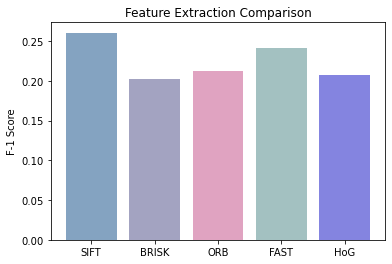

In [58]:
plt.bar(y_pos, y, align='center', color = [(0.2, 0.4, 0.6, 0.6),(0.4, 0.4, 0.6, 0.6),(0.8, 0.4, 0.6, 0.6),(0.4, 0.6, 0.6, 0.6),(0.2, 0.2, 0.8, 0.6)])
plt.xticks(y_pos, x)
plt.ylabel('F-1 Score')
plt.title('Feature Extraction Comparison')
plt.show()